# Import Libraries

In [799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

Read Data

In [800]:
df=pd.read_csv('titanic.csv')

# EDA & Data Preprocessing

In [801]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [803]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [804]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


data distribution

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


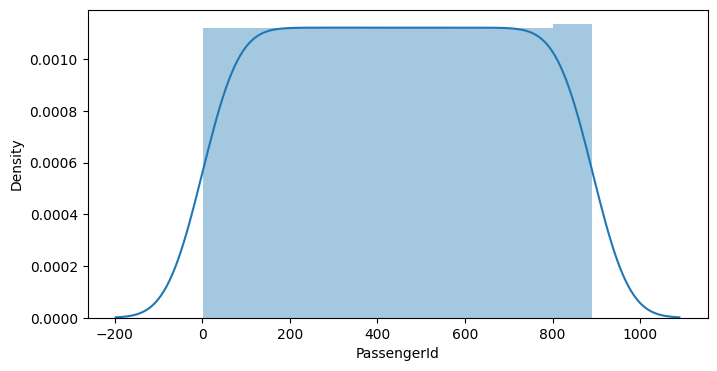

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


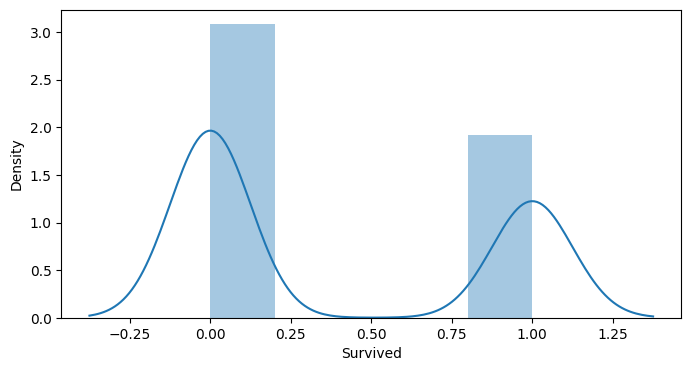

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


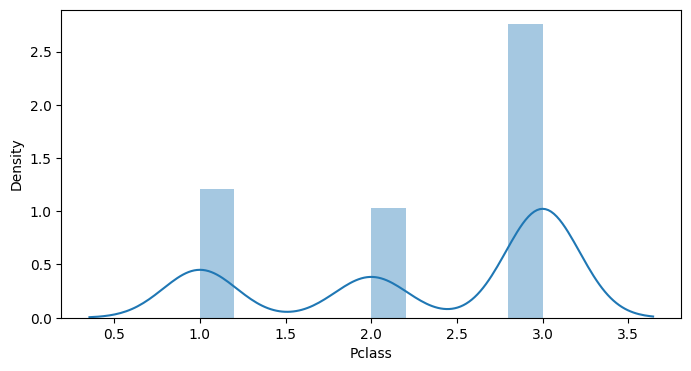

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


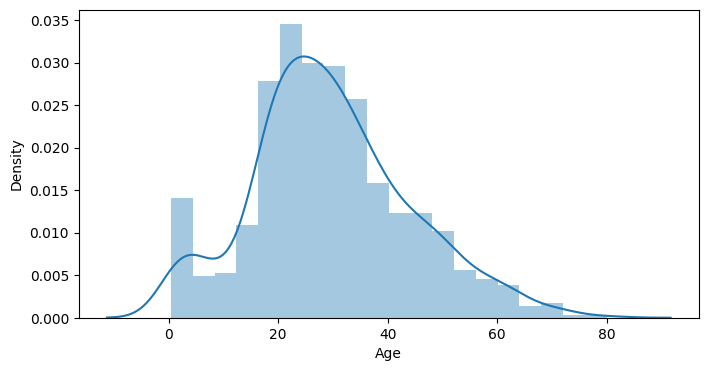

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


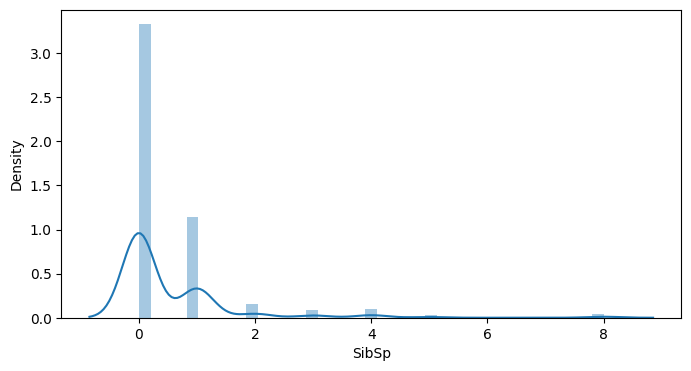

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


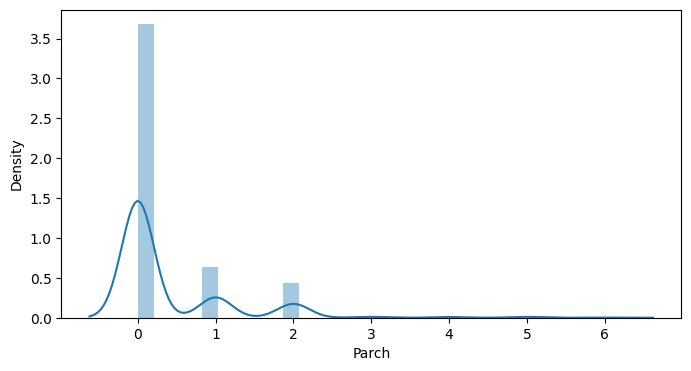

<ipython-input-805-940666875fb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=True, hist=True)


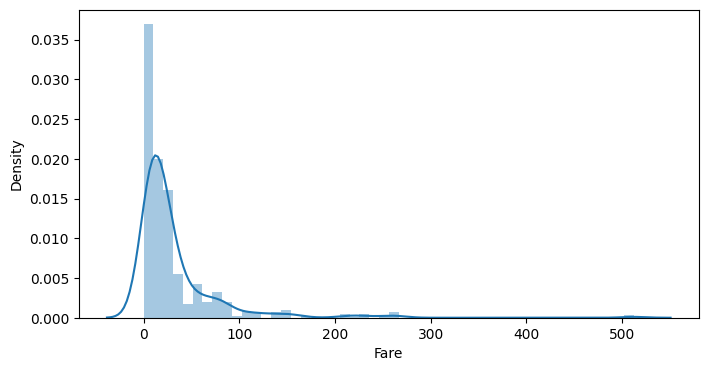

In [805]:
for column in df.select_dtypes(exclude='object').columns:
  plt.figure(figsize=(8, 4))
  sns.distplot(df[column], kde=True, hist=True)
  plt.show()

age distribution is skewed and its missing value count can still be filled. But cabin data has too much missing values, better to be dropped.

In [806]:
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
df=df.drop(columns=["Cabin"])
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

<ipython-input-806-9bfd4c8fb5d2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
<ipython-input-806-9bfd4c8fb5d2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [807]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


drop irrelevant data

In [808]:
df=df.drop(columns=['PassengerId','Name'])

split data

In [809]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [810]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=26)

Handling Categorical data

In [811]:
x_train=pd.get_dummies(x_train, columns=["Sex","Embarked","Pclass"])
x_test=pd.get_dummies(x_test, columns=["Sex","Embarked","Pclass"])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['Ticket'] = le.fit_transform(x_train['Ticket'])
x_test['Ticket'] = le.fit_transform(x_test['Ticket'])

correlation map

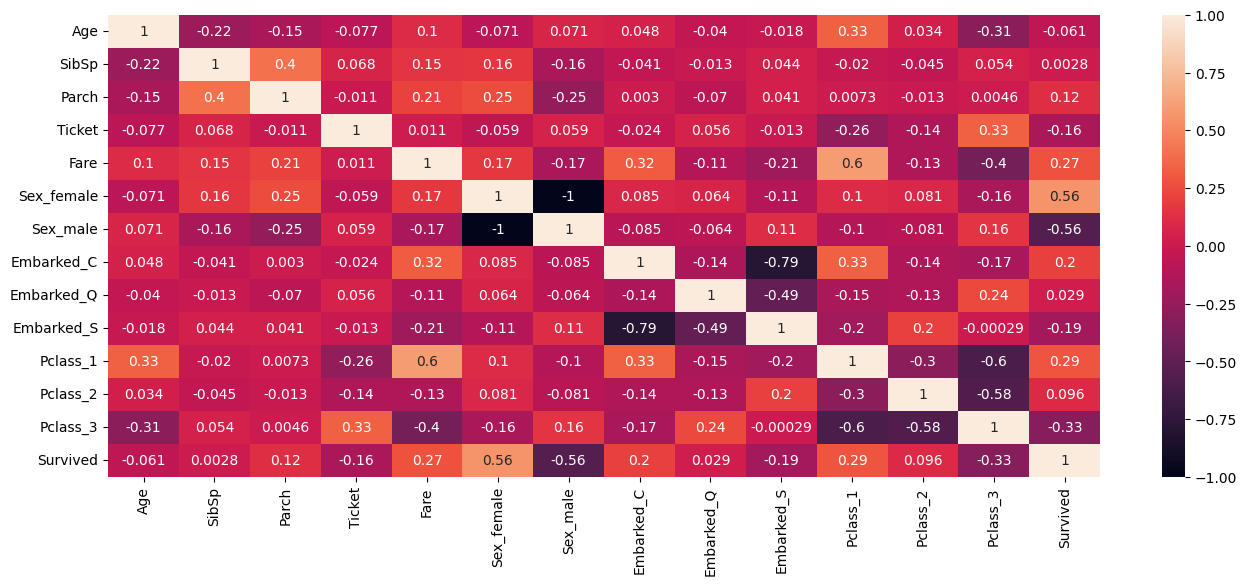

In [812]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(), vmin=-1, vmax=1, annot=True)

parch (parent and child aboard) and Sipsp (sibling and spourse) indicates how many family on board, we can combine into family onboard

In [813]:
x_train['TravelAlone']=np.where((x_train["SibSp"]+x_train["Parch"])>0, 0, 1)
x_test['TravelAlone']=np.where((x_test["SibSp"]+x_test["Parch"])>0, 0, 1)

# x_train=x_train.drop(columns=['SibSp','Parch'])
# x_test=x_test.drop(columns=['SibSp','Parch'])

barplot for correlation of survived and other column

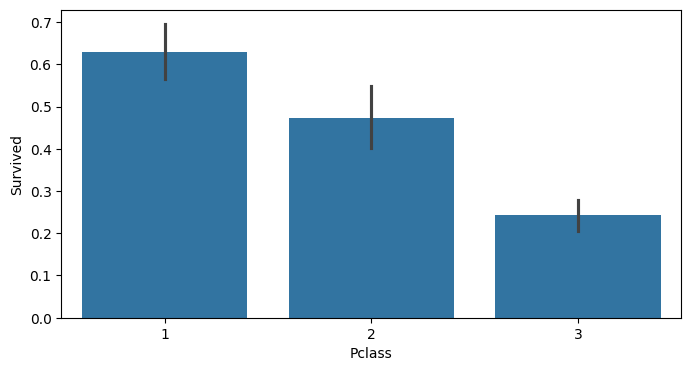

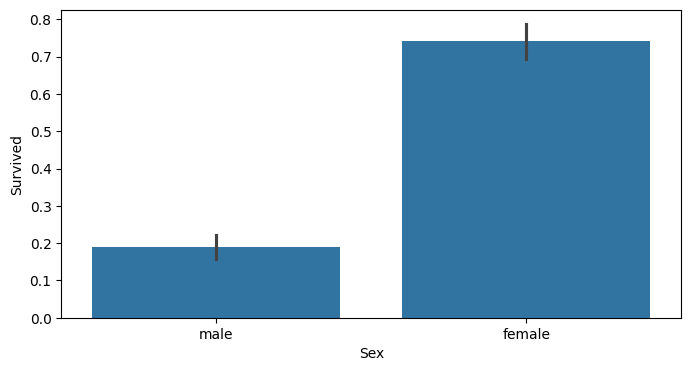

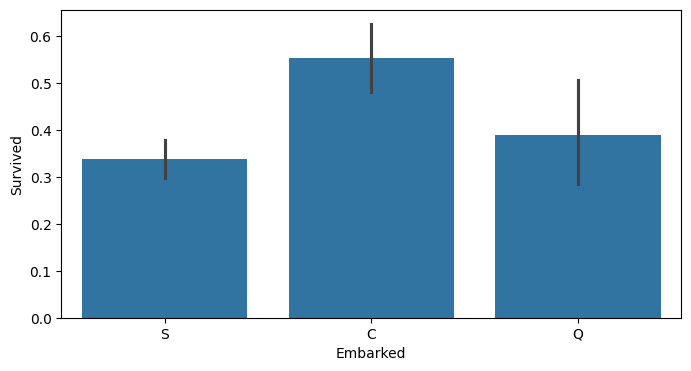

In [814]:
for column in df[['Pclass','Sex','Embarked']].columns:
  plt.figure(figsize=(8, 4))
  sns.barplot(x=column, y='Survived', data=df)
  plt.show()

box plot

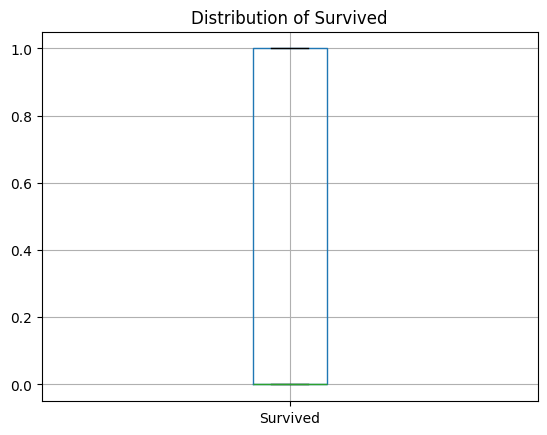

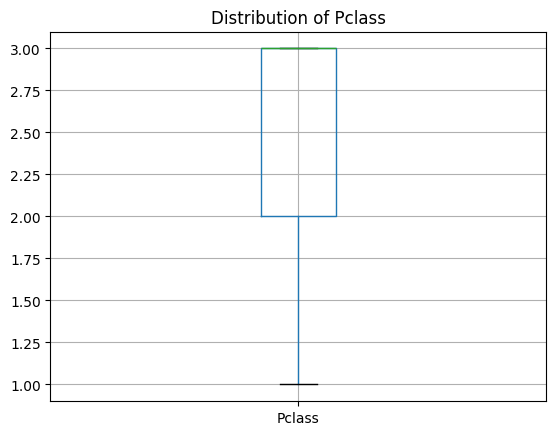

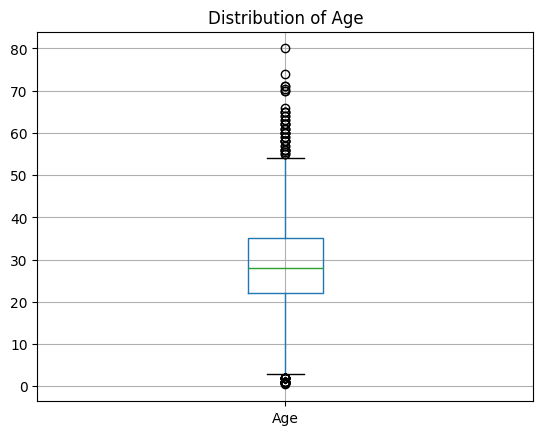

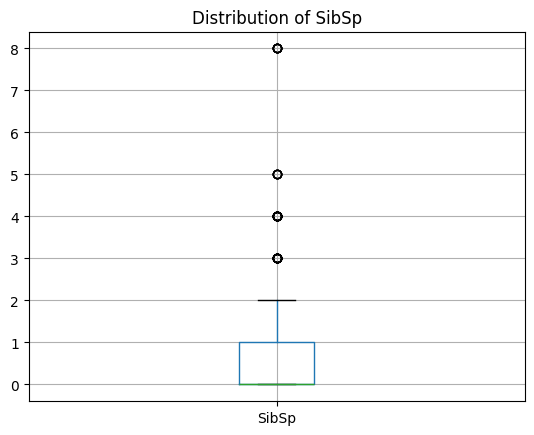

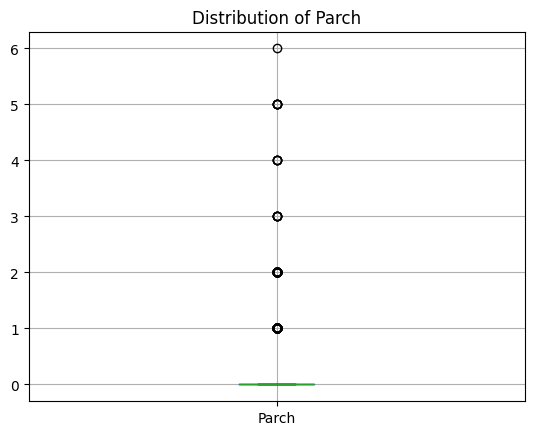

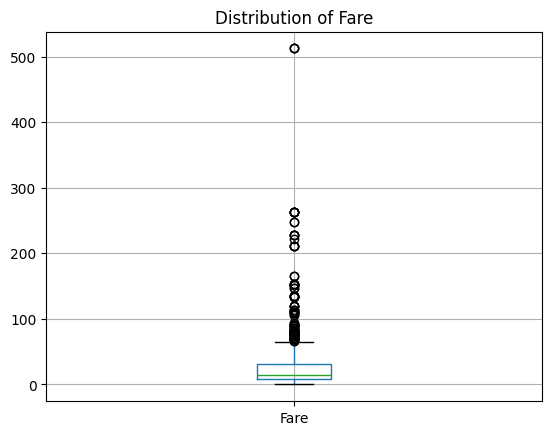

In [815]:
for column in df.select_dtypes(exclude='object').columns:
    df.boxplot(column=column)
    plt.title(f'Distribution of {column}')
    plt.show()

<Axes: xlabel='Fare', ylabel='Density'>

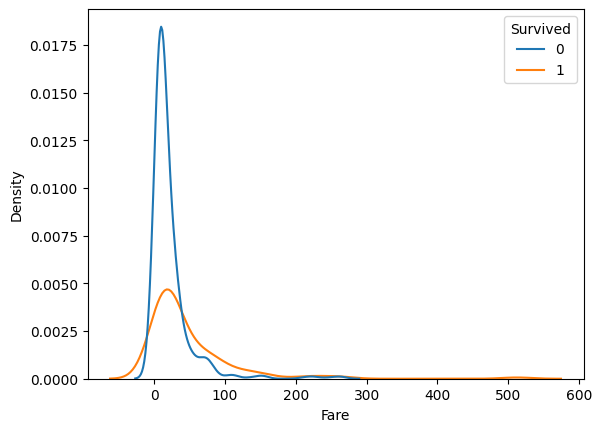

In [816]:
sns.kdeplot(data=df, x="Fare", hue="Survived")

<Axes: xlabel='Age', ylabel='Density'>

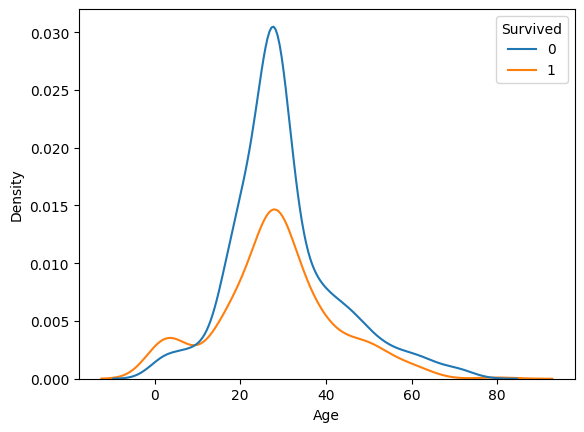

In [817]:
sns.kdeplot(data=df, x="Age", hue="Survived")

In [818]:
x_train['isMinor'] = x_train['Age'].apply(lambda x: 1 if x <= x_train['Age'].median() else 0)
x_test['isMinor'] = x_test['Age'].apply(lambda x: 1 if x <= x_test['Age'].median() else 0)

In [819]:
x_train_col = x_train.columns

Standarization using robust scaler

In [820]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Feature Selection


Optimal number of features: 12


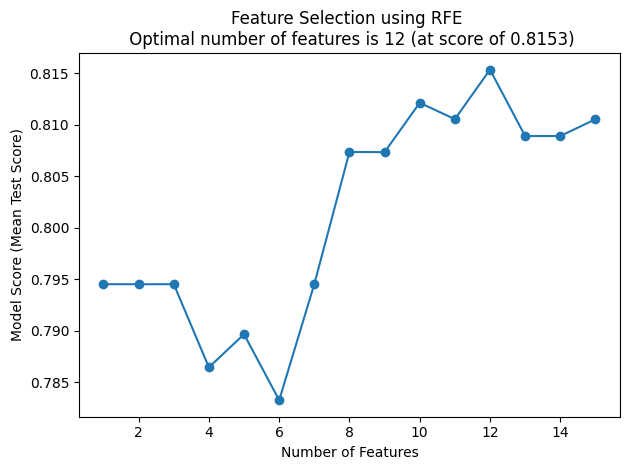

Selected Features (12):
Index(['Age', 'SibSp', 'Parch', 'Ticket', 'Sex_female', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_3', 'TravelAlone',
       'isMinor'],
      dtype='object')


In [821]:
# import rfecv and logistik reg
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Define X and y
X = pd.DataFrame(x_train_scaled, columns=x_train_col)
y = y_train

# Initialize the model and RFECV
regressor = LogisticRegression()
feature_selector = RFECV(regressor, cv=5, scoring='accuracy')

# Fit the RFECV model
fit = feature_selector.fit(X, y)

# Get the optimal number of features
optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

# Get the reduced feature setttributeError: 'RFECV' object has no attribute 'grid_scores_'
X_new = X.loc[:, feature_selector.get_support()]

# Plot the scores
plt.plot(
    range(1, len(feature_selector.cv_results_['mean_test_score']) + 1),
    feature_selector.cv_results_['mean_test_score'],
    marker="o"
)
plt.ylabel("Model Score (Mean Test Score)")
plt.xlabel("Number of Features")
plt.title(
    f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} "
    f"(at score of {round(max(feature_selector.cv_results_['mean_test_score']), 4)})"
)
plt.tight_layout()
plt.show()

# Get the mask of selected features
selected_features_mask = feature_selector.get_support()

# Get the names of selected features
selected_features = X.columns[selected_features_mask]

print(f"Selected Features ({len(selected_features)}):")
print(selected_features)

# Modeling

Based on RFECV and GridSearchCV

In [822]:
feature=selected_features

x_train_model = pd.DataFrame(x_train_scaled, columns=x_train_col)
x_train_model = x_train_model[feature]

x_test_model = pd.DataFrame(x_test_scaled, columns=x_train_col)
x_test_model = x_test_model[feature]

In [823]:
from sklearn.model_selection import GridSearchCV

parameters={'max_iter':[100000], "C":[0.01,0.1,0.5,1], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],  "penalty":["l2"]}
logistic=LogisticRegression()
clf=GridSearchCV(logistic,parameters)
clf.fit(x_train_model,y_train)
sorted(clf.cv_results_.keys())
clf

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'max_iter': [100000],
                         'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [828]:
model=LogisticRegression(C=0.5, max_iter=100000, solver='liblinear')
model.fit(x_train_model,y_train)

y_pred=model.predict(x_test_model)

#print result
print(classification_report(y_test,y_pred))

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("AUC-ROC: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       165
           1       0.74      0.69      0.71       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268

Accuracy:  0.7873134328358209
Precision:  0.7395833333333334
Recall:  0.6893203883495146
f1_score:  0.7135678391959799
AUC-ROC:  0.7689026184171815
